# Sprint20課題 セグメンテーション

## この課題の目的

- セグメンテーションを行う



## セグメンテーション

医療データに対するセグメンテーションを行います。KaggleのTGS Salt Identification Challengeのデータセットを使用します。

[TGS Salt Identification Challenge | Kaggle](https://www.kaggle.com/c/tgs-salt-identification-challenge)

セグメンテーション手法としてU-Net\[1\]を使います。

\[1\]O.Ronneberger, P.Fischer, T.Brox. U-Net: Convolutional Networks for Biomedical Image Segmentation. Medical Image Computing and Computer-Assisted Intervention (MICCAI), Springer, LNCS, Vol.9351: 234–241, 2015

[https://arxiv.org/pdf/1505.04597.pdf](https://arxiv.org/pdf/1505.04597.pdf)

## 【問題1】学習・推定

以下のKeras実装を使用して学習・推定を行ってください。

[zhixuhao/unet: unet for image segmentation](https://github.com/zhixuhao/unet)

GPU環境での学習

大規模なデータセット、大きなモデルになるため、GPUを使用する必要があります。

新たなデータセットの適用

Sprint18,19と同様に実装で用意されたものとは異なるデータセットを入力します。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import load_img

Using TensorFlow backend.


In [2]:
#ファイルをアップロード
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yuhisoejima","key":"2634857713af1415f450cf49bef0ce5f"}'}

In [0]:
#kaggleフォルダを作成し、そこにjsonをコピーする
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [0]:
#アクセスパーミッション
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
#kaggleデータの読み込み
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 73.7MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 65.4MB/s]
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 60.6MB/s]
 93% 152M/163M [00:00<00:00, 180MB/s]
100% 163M/163M [00:00<00:00, 194MB/s]
 87% 33.0M/37.9M [00:00<00:00, 109MB/s] 
100% 37.9M/37.9M [00:00<00:00, 150MB/s]


In [0]:
#学習データの解凍
!unzip train.zip -d train

In [0]:
#テストデータの解凍
!unzip test.zip -d test

In [0]:
#推定した画像を保存するディレクトリ
!mkdir 'test/results'

In [0]:
#unetモデルの解凍
!unzip unet.zip

### データの確認

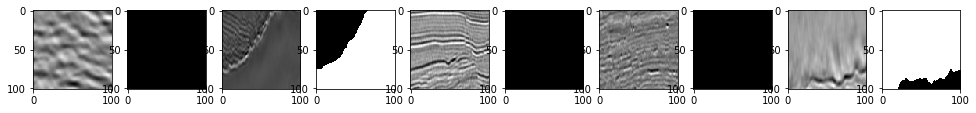

In [10]:
#適当なidのリスト
ids= ['000e218f21','13483cd62a','00441f1cf2','28a1187a4e','5a02df7676']

#imagesとmasks画像を表示
plt.figure(figsize=(20,10))
for j, img_name in enumerate(ids):
    q = j+1
    img = load_img('./train/images/' + img_name + '.png') #imagesの画像
    img_mask = load_img('./train/masks/' + img_name + '.png') #masksの画像
    
    plt.subplot(1,2*(1+len(ids)),q*2-1)
    plt.imshow(img)
    plt.subplot(1,2*(1+len(ids)),q*2)
    plt.imshow(img_mask)
plt.show()

学習用画像について、左から、あるIDのimagesの画像、masksの画像の順に並んでいる。

### 学習, 推定

In [11]:
%run unet/main.py

W0622 08:57:01.843465 139793632630656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0622 08:57:01.877020 139793632630656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0622 08:57:01.883755 139793632630656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0622 08:57:01.918435 139793632630656 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0622 08:57:01.984604 139793632630656 deprec

Epoch 1/10
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
500/500 [==============================] - 96s 192ms/step - loss: 0.6888 - acc: 0.7505

Epoch 00001: loss improved from inf to 0.68880, saving model to unet_membrane.hdf5
Epoch 2/10
500/500 [==============================] - 88s 175ms/step - loss: 0.6797 - acc: 0.7502

Epoch 00002: loss improved from 0.68880 to 0.67969, saving model to unet_membrane.hdf5
Epoch 3/10
500/500 [==============================] - 89s 179ms/step - loss: 0.6718 - acc: 0.7472

Epoch 00003: loss improved from 0.67969 to 0.67180, saving model to unet_membrane.hdf5
Epoch 4/10
500/500 [==============================] - 89s 179ms/step - loss: 0.6627 - acc: 0.7591

Epoch 00004: loss improved from 0.67180 to 0.66268, saving model to unet_membrane.hdf5
Epoch 5/10
500/500 [==============================] - 90s 179ms/step - loss: 0.6557 - acc: 0.7548

Epoch 00005: loss improved from 0.66268 to 0.65568, saving model to unet_memb

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: test/results/b2afc5f0b4.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0622 09:12:23.022027 139793632630656 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: test/results/7c3c2d6b19.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0622 09:12:23.028984 139793632630656 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:141: UserWarning: test/results/15117177f0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
W0622 09:12:23.034812 139793632630656 util.py:61] Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to 

<Figure size 432x288 with 0 Axes>

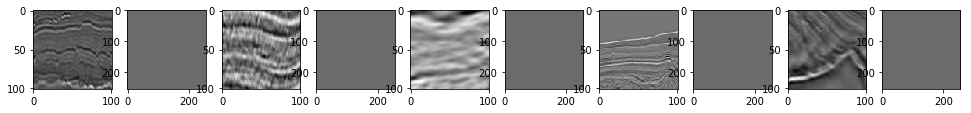

In [13]:
#適当なidのリスト
ids= ['051c0a2ddb', '05bb19ebcd', '15117177f0', '196638fe77', '3003a4c4c8']

plt.figure(figsize=(20,10))

#imagesとresults画像を表示
for j, img_name in enumerate(ids):
    q = j+1
    img = load_img('./test/images/' + img_name + '.png') #imagesの画像
    img_mask = load_img('./test/results/' + img_name + '.png') #resultsの画像
    
    plt.subplot(1,2*(1+len(ids)),q*2-1)
    plt.imshow(img)
    plt.subplot(1,2*(1+len(ids)),q*2)
    plt.imshow(img_mask)
plt.show()

テスト画像について、左から、あるIDのimagesの画像、出力されたresults(結果)の画像の順に並んでいる。

学習不足のため、推定画像はすべて灰色となっている。

## 【問題2】コードリーディング

論文\[1\]に目を通した上で、上記実装のコードリーディングを行ってください。

In [ ]:
### main.py

from model import *
from data import *

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

#argmentation
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
                    
#学習用画像を取得
myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

#モデルを作成
model = unet()

#チェックポイントを作成
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)

#学習
model.fit_generator(myGene,steps_per_epoch=300,epochs=1,callbacks=[model_checkpoint])

#テスト画像を取得
testGene = testGenerator("data/membrane/test")

#推定
results = model.predict_generator(testGene,30,verbose=1)

#推定した画像を保存
saveResult("data/membrane/test",results)


In [ ]:
### data.py


from __future__ import print_function
from keras.preprocessing.image import ImageDataGenerator
import numpy as np 
import os
import glob
import skimage.io as io
import skimage.transform as trans

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

COLOR_DICT = np.array([Sky, Building, Pole, Road, Pavement,
                          Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])


def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
        
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
        
    return (img,mask)


def trainGenerator(batch_size,train_path,image_folder,mask_folder,aug_dict,image_color_mode = "grayscale",
                    mask_color_mode = "grayscale",image_save_prefix  = "image",mask_save_prefix  = "mask",
                    flag_multi_class = False,num_class = 2,save_to_dir = None,target_size = (256,256),seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)


def testGenerator(test_path,num_image = 30,target_size = (256,256),flag_multi_class = False,as_gray = True):
    for i in range(num_image):
        img = io.imread(os.path.join(test_path,"%d.png"%i),as_gray = as_gray)
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img


def geneTrainNpy(image_path,mask_path,flag_multi_class = False,num_class = 2,image_prefix = "image",mask_prefix = "mask",image_as_gray = True,mask_as_gray = True):
    image_name_arr = glob.glob(os.path.join(image_path,"%s*.png"%image_prefix))
    image_arr = []
    mask_arr = []
    for index,item in enumerate(image_name_arr):
        img = io.imread(item,as_gray = image_as_gray)
        img = np.reshape(img,img.shape + (1,)) if image_as_gray else img
        mask = io.imread(item.replace(image_path,mask_path).replace(image_prefix,mask_prefix),as_gray = mask_as_gray)
        mask = np.reshape(mask,mask.shape + (1,)) if mask_as_gray else mask
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        image_arr.append(img)
        mask_arr.append(mask)
    image_arr = np.array(image_arr)
    mask_arr = np.array(mask_arr)
    return image_arr,mask_arr


def labelVisualize(num_class,color_dict,img):
    img = img[:,:,0] if len(img.shape) == 3 else img
    img_out = np.zeros(img.shape + (3,))
    for i in range(num_class):
        img_out[img == i,:] = color_dict[i]

    return img_out / 255


def saveResult(save_path,npyfile,flag_multi_class = False,num_class = 2):
    for i,item in enumerate(npyfile):
        img = labelVisualize(num_class,COLOR_DICT,item) if flag_multi_class else item[:,:,0]
        io.imsave(os.path.join(save_path,"%d_predict.png"%i),img)

In [ ]:
### model.py

import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (256,256,1)):
    '''
    u-netのモデルを作成する関数
    '''
    #入力(Lv.4)
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    
    #MaxPool
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    #Lv.3
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    
    #MaxPool
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    #Lv.2
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    
    #MaxPool
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    #Lv.1
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    
    #MaxPool
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
    #Lv.0
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    #UpConv
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    
    #Lv.1
    #情報を結合
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    #UpConv
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
        
    #Lv.2
    #情報を結合
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    
    #UpConv
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    
    #Lv.3
    #情報を結合
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    
    #UpConv
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    
    #出力(Lv.4)
    #情報を結合
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)
    
    #モデルを定義
    model = Model(input = inputs, output = conv10)
    
    #コンパイル
    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()
    
    #重みがあればロード
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

### U-Netの構成

**model.py**
- U-Net  
入力部分(Conv + Conv + MaxPool)  
↓  
ダウンサンプリング(Conv + Conv + (Drop) + MaxPool) $\times$ 3  
↓  
中間(Conv + Conv + Drop + UpConv)  
↓  
アップサンプリング(Concat + Conv + Conv + UpConv) $\times$ 3  
↓  
出力(Concat + Conv + Conv + Conv + Conv)


- モデル
    - inputのshape  
    デフォルト256 $\times$ 256 $\times$ 1
    - Optimizer  
     Adam(学習率1e-4)
    - Loss  
     binary_crossentropy
    - metrics  
     accuracy

### 画像の取得(学習用)

**data.py**

trainGenerator関数

- KerasのImageDataGenerator()でAugmentation
- image_folder,mask_folderでフォルダ名を、train_pathでpath名を取得、Kerasのpathflow_from_directory()で画像データのバッチを生成
- AdjustData関数でimageは正規化、maskは0, 1に変換し、画像データをyield

### 画像の取得(テスト用)

**data.py**

testGenerator関数

- test_pathでテスト画像のpath名を取得し、その画像データを取得
- 255で割り正規化
- 256 $\times$ 256にresize
- Kerasのpredict_generator()で処理できるようにreshapeし、画像データをyield

### 推定画像の保存

**data.py**

SaveResult関数

- save_pathでテスト画像のpath名、npyfileで推定結果を取得
- もしflag_multi_class==TrueならlabelVisualize関数へ、Falseならnpyfileの\[:, :, 0\]部分を取得(今回はFalse)
- skimageのio.imsaveで画像データを保存